# Contexto de la Base de Datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd #libreria de lectura de doc, matemática etc...
import numpy as np #Librería de algebra, y clave del data Science
import seaborn as sns # Una de las muchas  librerias para gráficos(con la que tengo familiaridad)
import scipy.stats as stats #Liberia de estadística
from matplotlib import pyplot as plt
import plotly.express as px
import random
#Se agregarán más en cuanto avance el temario de clase


In [4]:
df = pd.read_csv("/content/drive/MyDrive/EstadisticaProyecto/CalidadSueño/Sleep_health_and_lifestyle_dataset.csv")
df.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200           None  
1         125/80          75        10000           None  
2         125/80          75        10000           None  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

In [5]:
#limites del dataset son [0,373]

tam_muestra = 131
sueño = df.sample(n=tam_muestra, random_state=42) #es una muestra aleatoria de 131 registros

# Objetivo del estudio del DataSet

El objetivo del estudio de este conjunto de datos es observar que características comparten los individuos que tienen
una mala o pobre calidad  de sueño. Me gustaría identificar cuales son los atributos que más influyen negativamente a la calidad de sueño de una persona y intentar identificar las causas principales que afectan al sueño.

# Medidas de Dispersión

In [6]:
sueño.describe()

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  131.000000  131.000000      131.000000        131.000000   
mean   181.549618   41.770992        7.103053          7.236641   
std    113.756164    9.224186        0.816082          1.257788   
min      1.000000   27.000000        5.900000          4.000000   
25%     79.500000   33.000000        6.300000          6.000000   
50%    173.000000   41.000000        7.200000          7.000000   
75%    285.000000   50.000000        7.800000          8.000000   
max    373.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               131.000000    131.000000  131.000000    131.000000  
mean                 56.274809      5.519084   70.297710   6630.534351  
std                  20.401001      1.798936    4.109454   1595.951278  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  40.000000      4.000000   68.000000   5000.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   85.000000  10000.000000

In [7]:
sueño.describe(exclude = np.number)

Gender Occupation BMI Category Blood Pressure Sleep Disorder
count     131        131          131            131            131
unique      2          9            4             14              3
top      Male      Nurse       Normal         130/85           None
freq       73         28           69             37             73

In [8]:
sueño.nunique()

Person ID                  131
Gender                       2
Age                         27
Occupation                   9
Sleep Duration              25
Quality of Sleep             6
Physical Activity Level     11
Stress Level                 6
BMI Category                 4
Blood Pressure              14
Heart Rate                  10
Daily Steps                 11
Sleep Disorder               3
dtype: int64

In [9]:
sueño.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 329 to 338
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                131 non-null    int64  
 1   Gender                   131 non-null    object 
 2   Age                      131 non-null    int64  
 3   Occupation               131 non-null    object 
 4   Sleep Duration           131 non-null    float64
 5   Quality of Sleep         131 non-null    int64  
 6   Physical Activity Level  131 non-null    int64  
 7   Stress Level             131 non-null    int64  
 8   BMI Category             131 non-null    object 
 9   Blood Pressure           131 non-null    object 
 10  Heart Rate               131 non-null    int64  
 11  Daily Steps              131 non-null    int64  
 12  Sleep Disorder           131 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 14.3+ KB


In [10]:
hombres = sueño[sueño['Gender']=='Male']['Sleep Duration'].mean()
mujeres = sueño[sueño['Gender']=='Female']['Sleep Duration'].mean()
print(f'la media de la duracion de sueño de los hombres es de: {hombres:.2f}')
print(f'la media de la duracion de sueño de las mujeres es de: {mujeres:.2f}')


la media de la duracion de sueño de los hombres es de: 6.89
la media de la duracion de sueño de las mujeres es de: 7.37


In [11]:
hombres = sueño[sueño['Gender']=='Male']['Quality of Sleep'].mean()
mujeres = sueño[sueño['Gender']=='Female']['Quality of Sleep'].mean()
print(f'la media de la calidad de sueño de los hombres es de: {hombres:.2f}')
print(f'la media de la calidad de sueño de las mujeres es de: {mujeres:.2f}')

la media de la calidad de sueño de los hombres es de: 6.81
la media de la calidad de sueño de las mujeres es de: 7.78


In [12]:
hombres = sueño[sueño['Gender']=='Male']['Stress Level'].mean()
mujeres = sueño[sueño['Gender']=='Female']['Stress Level'].mean()
print(f'la media del nivel estrés de los hombres es de: {hombres:.2f}')
print(f'la media del nivel de estrés de las mujeres es de: {mujeres:.2f}')

la media del nivel estrés de los hombres es de: 6.32
la media del nivel de estrés de las mujeres es de: 4.52


In [13]:

hombres = sueño[sueño['Gender']=='Male']['Physical Activity Level'].mean()
mujeres = sueño[sueño['Gender']=='Female']['Physical Activity Level'].mean()
print(f'la media del nivel de actividad física de los hombres es de: {hombres:.2f}')
print(f'la media del nivel de actividad física de las mujeres es de: {mujeres:.2f}')

la media del nivel de actividad física de los hombres es de: 54.62
la media del nivel de actividad física de las mujeres es de: 58.36


In [14]:
# Definir una función para aplicar la transformación
def transformar_presion_arterial(presion_arterial):
    valores = presion_arterial.split('/')
    presion_sistolica = float(valores[0])
    presion_diastolica = float(valores[1])
    resultado = presion_sistolica / presion_diastolica
    return resultado

# Aplicar la transformación a toda la columna
sueño['Blood Pressure Num'] = sueño['Blood Pressure'].apply(transformar_presion_arterial)

#Comprobar que se creo la nueva columna
sueño.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 329 to 338
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                131 non-null    int64  
 1   Gender                   131 non-null    object 
 2   Age                      131 non-null    int64  
 3   Occupation               131 non-null    object 
 4   Sleep Duration           131 non-null    float64
 5   Quality of Sleep         131 non-null    int64  
 6   Physical Activity Level  131 non-null    int64  
 7   Stress Level             131 non-null    int64  
 8   BMI Category             131 non-null    object 
 9   Blood Pressure           131 non-null    object 
 10  Heart Rate               131 non-null    int64  
 11  Daily Steps              131 non-null    int64  
 12  Sleep Disorder           131 non-null    object 
 13  Blood Pressure Num       131 non-null    float64
dtypes: float64(2), int64(7),

In [15]:
hombres = sueño[sueño['Gender']=='Male']['Blood Pressure Num'].mean()
mujeres = sueño[sueño['Gender']=='Female']['Blood Pressure Num'].mean()
print(f'la media de la presión sangrínea  en los hombres es de: {hombres:.2f}')
print(f'la media de la presión sangrínea  en las mujeres es de: {mujeres:.2f}')

la media de la presión sangrínea  en los hombres es de: 1.53
la media de la presión sangrínea  en las mujeres es de: 1.51


Las mujeres tienen mejor puntuacion que los hombres en todos los campos que se realizo un estudio. Esto quiza se debe a que la muestra es muy pequeña y quiza, la al haber más cantidad de hombres la muestra este sesgada, de lo contrario esto nos dice que las mujeres de esta muestra tienen una vida más saludable que los hombres, ya que tienen menos estres, menos presión sangrínea, más actividad física y mejor calidad y cantidad de sueño.

In [16]:
mujeres = sueño[sueño['Gender']=='Female']['Occupation'].value_counts().head(5).index
hombres = sueño[sueño['Gender']=='Male']['Occupation'].value_counts().head(5).index
print(mujeres)
print(hombres)


Index(['Nurse', 'Engineer', 'Accountant', 'Teacher', 'Lawyer'], dtype='object')
Index(['Doctor', 'Lawyer', 'Salesperson', 'Engineer', 'Software Engineer'], dtype='object')


Index(['Nurse', 'Doctor', 'Lawyer', 'Engineer', 'Salesperson'], dtype='object')


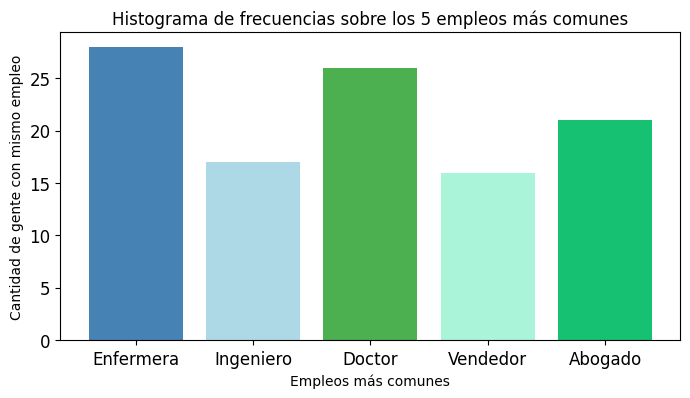

In [17]:
plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias sobre los 5 empleos más comunes')

Empleos = sueño['Occupation'].value_counts().head(5).index
print(Empleos)
Nurse = sueño[sueño['Occupation']=='Nurse'].value_counts().sum()
Engineer = sueño[sueño['Occupation']=='Engineer'].value_counts().sum()
Doctor = sueño[sueño['Occupation']=='Doctor'].value_counts().sum()
Salesman = sueño[sueño['Occupation']=='Salesperson'].value_counts().sum()
Lawyer = sueño[sueño['Occupation']=='Lawyer'].value_counts().sum()

plt.bar(['Enfermera', 'Ingeniero', 'Doctor', 'Vendedor' , 'Abogado'],
        [Nurse, Engineer ,Doctor, Salesman, Lawyer]
       , color=['#4682B4', '#ADD8E6', '#4CAF50', '#AAF4D9', '#16C172'])

plt.xlabel('Empleos más comunes')
plt.ylabel('Cantidad de gente con mismo empleo')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Index(['None', 'Sleep Apnea', 'Insomnia'], dtype='object')


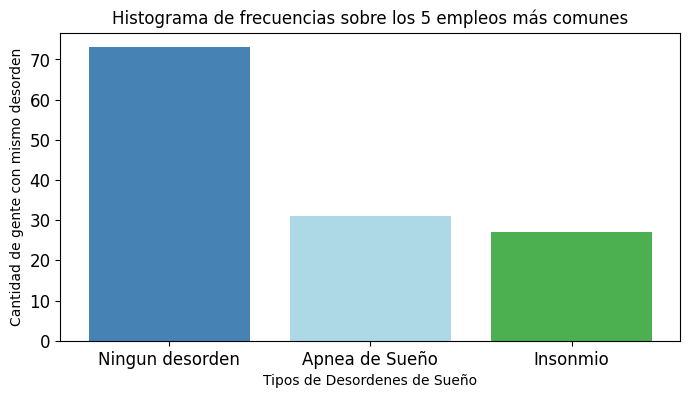

In [18]:
plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias sobre los 5 empleos más comunes')
disorder = sueño['Sleep Disorder'].value_counts().head(5).index
print(disorder)
Ningun = sueño[sueño['Sleep Disorder']=='None'].value_counts().sum()
Apnea = sueño[sueño['Sleep Disorder']=='Sleep Apnea'].value_counts().sum()
Insomnia = sueño[sueño['Sleep Disorder']=='Insomnia'].value_counts().sum()
total = Ningun+ Apnea + Insomnia
plt.bar(['Ningun desorden', 'Apnea de Sueño', 'Insonmio'],
        [Ningun, Apnea ,Insomnia]
       , color=['#4682B4', '#ADD8E6', '#4CAF50'])

plt.xlabel('Tipos de Desordenes de Sueño')
plt.ylabel('Cantidad de gente con mismo desorden')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

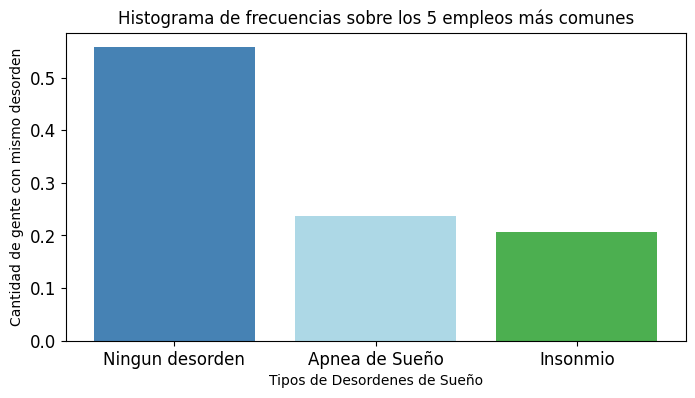

In [19]:
plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias sobre los 5 empleos más comunes')

plt.bar(['Ningun desorden', 'Apnea de Sueño', 'Insonmio'],
        [Ningun/total, Apnea/total ,Insomnia/total]
       , color=['#4682B4', '#ADD8E6', '#4CAF50'])

plt.xlabel('Tipos de Desordenes de Sueño')
plt.ylabel('Cantidad de gente con mismo desorden')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [20]:
sueño['Blood Pressure Num'].head()

329    1.5625
33     1.5625
15     1.5000
325    1.5625
57     1.5625
Name: Blood Pressure Num, dtype: float64

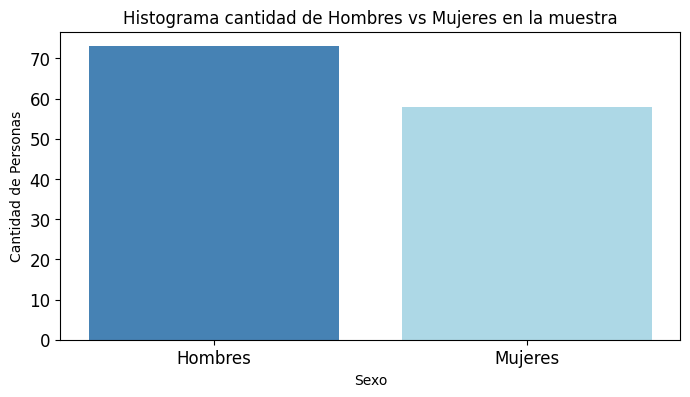

In [21]:
plt.figure(figsize=(8, 4))
plt.title('Histograma cantidad de Hombres vs Mujeres en la muestra')
hombrescant = sueño[sueño['Gender']=='Male'].value_counts().sum()
mujerescant = sueño[sueño['Gender']=='Female'].value_counts().sum()
total = hombrescant + mujerescant
plt.bar(['Hombres', 'Mujeres'],
        [hombrescant, mujerescant]
       , color=['#4682B4', '#ADD8E6'])

plt.xlabel('Sexo')
plt.ylabel('Cantidad de Personas')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


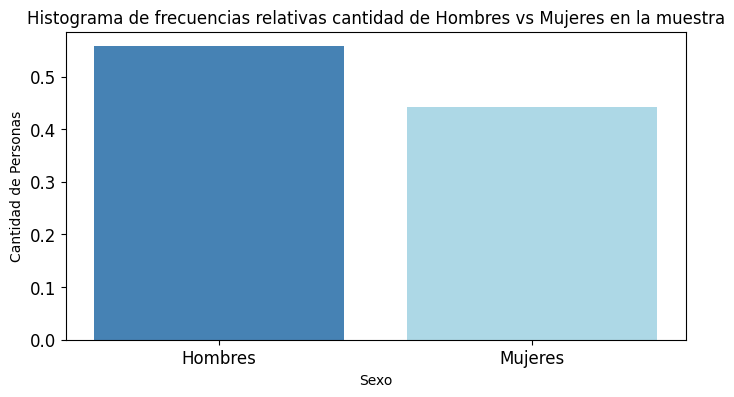

In [22]:
plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias relativas cantidad de Hombres vs Mujeres en la muestra')

plt.bar(['Hombres', 'Mujeres'],
        [hombrescant/total, mujerescant/total]
       , color=['#4682B4', '#ADD8E6'])

plt.xlabel('Sexo')
plt.ylabel('Cantidad de Personas')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [23]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 89.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=dc911b7d87975023be46baaaa5eea17ff2cbfa91c3b28f3a770b8afd031ac491
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2


In [24]:
import ydata_profiling
ydata_profiling.ProfileReport(sueño)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]